In [ ]:
#This step is done to connect the content directory to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import  classification_report,confusion_matrix

In [ ]:
hr1 = pd.read_csv("/content/drive/MyDrive/Data_mining PA2/hr_1.csv")
hr1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,1,0,2,1,1,0,1,1,2,1,0,0,0,60.0,0,1,Subset 1
1,2,0,1,1,0,0,1,48,4,1,0,0,0,94.5,0,1,Subset 1
2,1,0,2,1,1,0,4,35,4,1,0,0,0,140.4,1,0,Subset 1
3,2,0,2,4,1,0,1,2,3,0,0,0,0,85.0,0,0,Subset 1
4,2,0,0,2,1,0,1,99,4,1,0,0,0,114.3,1,0,Subset 1


In [ ]:
# prompt: count booking_status percent
# data imbalanced, need solve this problem first.
booking_status_counts = hr1['booking_status'].value_counts()
booking_status_percentages = booking_status_counts * 100 / booking_status_counts.sum()
print(booking_status_percentages)


booking_status
0    72.491039
1    27.508961
Name: count, dtype: float64


In [ ]:
hr2 = pd.read_csv("/content/drive/MyDrive/Data_mining PA2/hr_2.csv")
hr2.shape

(12534, 17)

In [ ]:
hr3 = pd.read_csv("/content/drive/MyDrive/Data_mining PA2/hr_3.csv")
hr3.shape

(15929, 17)

# **Standardize**

hr1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# select columns
columns_not_to_scale = ['booking_status', 'required_car_parking_space', 'repeated_guest','subset_group']
columns_to_scale = hr1.columns.difference(columns_not_to_scale)

# scale columns
hr1_scaled = hr1.copy()
hr1_scaled[columns_to_scale] = scaler.fit_transform(hr1[columns_to_scale])


hr1_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,-0.503683,-0.938538,-0.842968,0.219900,0,-0.076984,-0.126608,-0.995443,-0.748857,1,Subset 1
1,0.360034,-0.252507,0.172526,-0.788903,-2.014887,0,-0.503683,-0.066676,1.089329,0.219900,0,-0.076984,-0.126608,0.120662,-0.748857,1,Subset 1
2,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,1.702733,-0.307829,1.089329,0.219900,0,-0.076984,-0.126608,1.605566,0.775392,0,Subset 1
3,0.360034,-0.252507,1.302261,1.310658,0.219681,0,-0.503683,-0.919988,0.123180,-1.341791,0,-0.076984,-0.126608,-0.186671,-0.748857,0,Subset 1
4,0.360034,-0.252507,-0.957209,-0.089049,0.219681,0,-0.503683,0.879387,1.089329,0.219900,0,-0.076984,-0.126608,0.761209,0.775392,0,Subset 1


In [ ]:
# prompt: drop the last column

hr1_scaled = hr1_scaled.drop(['subset_group'], axis=1)
hr1_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,-0.503683,-0.938538,-0.842968,0.219900,0,-0.076984,-0.126608,-0.995443,-0.748857,1
1,0.360034,-0.252507,0.172526,-0.788903,-2.014887,0,-0.503683,-0.066676,1.089329,0.219900,0,-0.076984,-0.126608,0.120662,-0.748857,1
2,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,1.702733,-0.307829,1.089329,0.219900,0,-0.076984,-0.126608,1.605566,0.775392,0
3,0.360034,-0.252507,1.302261,1.310658,0.219681,0,-0.503683,-0.919988,0.123180,-1.341791,0,-0.076984,-0.126608,-0.186671,-0.748857,0
4,0.360034,-0.252507,-0.957209,-0.089049,0.219681,0,-0.503683,0.879387,1.089329,0.219900,0,-0.076984,-0.126608,0.761209,0.775392,0


In [ ]:
hr1_scaled.shape

(7812, 16)

hr2

In [ ]:
columns_to_scale = hr2.columns.difference(columns_not_to_scale)

hr2_scaled = hr2.copy()
hr2_scaled[columns_to_scale] = scaler.fit_transform(hr2[columns_to_scale])

hr2_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,0.17801,-0.303819,-0.926177,-0.175459,0.047692,0,-0.539036,1.356492,-1.458688,0.321398,0,-0.061613,-0.075946,-0.372123,-0.801364,1,Subset 2
1,2.06724,-0.303819,-0.926177,1.193484,0.047692,0,-0.539036,0.261209,0.326606,-1.326886,0,-0.061613,-0.075946,-0.463306,0.508534,0,Subset 2
2,0.17801,-0.303819,-0.926177,-0.175459,2.046937,0,-0.539036,1.904133,-0.566041,0.321398,0,-0.061613,-0.075946,0.069084,0.508534,1,Subset 2
3,0.17801,-0.303819,0.200772,0.509012,-1.951553,0,-0.539036,-1.199168,1.219253,0.321398,0,-0.061613,-0.075946,-0.489778,0.508534,0,Subset 2
4,0.17801,-0.303819,1.327721,-0.859931,-1.951553,0,-0.539036,0.370737,-1.458688,0.321398,0,-0.061613,-0.075946,-0.533899,0.508534,0,Subset 2


In [ ]:
hr2_scaled = hr2_scaled.drop(['subset_group'], axis=1)
hr2_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.17801,-0.303819,-0.926177,-0.175459,0.047692,0,-0.539036,1.356492,-1.458688,0.321398,0,-0.061613,-0.075946,-0.372123,-0.801364,1
1,2.06724,-0.303819,-0.926177,1.193484,0.047692,0,-0.539036,0.261209,0.326606,-1.326886,0,-0.061613,-0.075946,-0.463306,0.508534,0
2,0.17801,-0.303819,-0.926177,-0.175459,2.046937,0,-0.539036,1.904133,-0.566041,0.321398,0,-0.061613,-0.075946,0.069084,0.508534,1
3,0.17801,-0.303819,0.200772,0.509012,-1.951553,0,-0.539036,-1.199168,1.219253,0.321398,0,-0.061613,-0.075946,-0.489778,0.508534,0
4,0.17801,-0.303819,1.327721,-0.859931,-1.951553,0,-0.539036,0.370737,-1.458688,0.321398,0,-0.061613,-0.075946,-0.533899,0.508534,0


In [ ]:
hr2_scaled.shape

(12534, 16)

hr3

In [ ]:
columns_to_scale = hr3.columns.difference(columns_not_to_scale)

hr3_scaled = hr3.copy()
hr3_scaled[columns_to_scale] = scaler.fit_transform(hr3[columns_to_scale])

hr3_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,0.370486,-0.229186,0.254352,-0.147991,0.098275,0,-0.481972,1.382087,-0.257278,-1.146367,0,-0.089107,-0.079335,-1.044816,-0.808896,0,Subset 3
1,0.370486,-0.229186,1.432133,0.587762,-1.994536,0,-0.481972,-0.884723,0.671805,0.328036,0,-0.089107,-0.079335,0.120563,0.365448,0,Subset 3
2,0.370486,-0.229186,-0.923430,-0.147991,2.191086,0,-0.481972,2.644876,-1.186362,0.328036,0,-0.089107,-0.079335,0.353192,0.365448,1,Subset 3
3,0.370486,-0.229186,0.254352,0.587762,0.098275,0,-0.481972,-0.584552,-0.257278,0.328036,0,-0.089107,-0.079335,0.144889,0.365448,0,Subset 3
4,0.370486,-0.229186,0.254352,0.587762,0.098275,0,1.723312,-0.077366,1.600888,0.328036,0,-0.089107,-0.079335,0.090646,0.365448,0,Subset 3


In [ ]:
hr3_scaled = hr3_scaled.drop(['subset_group'], axis=1)
hr3_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.370486,-0.229186,0.254352,-0.147991,0.098275,0,-0.481972,1.382087,-0.257278,-1.146367,0,-0.089107,-0.079335,-1.044816,-0.808896,0
1,0.370486,-0.229186,1.432133,0.587762,-1.994536,0,-0.481972,-0.884723,0.671805,0.328036,0,-0.089107,-0.079335,0.120563,0.365448,0
2,0.370486,-0.229186,-0.923430,-0.147991,2.191086,0,-0.481972,2.644876,-1.186362,0.328036,0,-0.089107,-0.079335,0.353192,0.365448,1
3,0.370486,-0.229186,0.254352,0.587762,0.098275,0,-0.481972,-0.584552,-0.257278,0.328036,0,-0.089107,-0.079335,0.144889,0.365448,0
4,0.370486,-0.229186,0.254352,0.587762,0.098275,0,1.723312,-0.077366,1.600888,0.328036,0,-0.089107,-0.079335,0.090646,0.365448,0


In [ ]:
hr3_scaled.shape

(15929, 16)

# **RFE-DecisionTree**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

**hr1**

In [ ]:
X = hr1_scaled.drop('booking_status', axis=1)
y = hr1_scaled['booking_status']

tree_rfe = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=tree_rfe, n_features_to_select=8)
rfe.fit(X, y)


RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=8)

In [ ]:
rfe.n_features_

8

In [ ]:
rfe.get_support()

array([ True, False,  True,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True])

In [ ]:
rfe.ranking_

array([1, 5, 1, 1, 3, 4, 2, 1, 1, 1, 8, 7, 6, 1, 1])

In [ ]:
rfe.get_feature_names_out()

array(['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'lead_time', 'arrival_month', 'market_segment_type',
       'avg_price_per_room', 'no_of_special_requests'], dtype=object)

In [ ]:
hr1_rfe = hr1_scaled[rfe.get_feature_names_out()]
hr1_rfe.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests
0,-1.546802,1.302261,-0.788903,-0.938538,-0.842968,0.219900,-0.995443,-0.748857
1,0.360034,0.172526,-0.788903,-0.066676,1.089329,0.219900,0.120662,-0.748857
2,-1.546802,1.302261,-0.788903,-0.307829,1.089329,0.219900,1.605566,0.775392
3,0.360034,1.302261,1.310658,-0.919988,0.123180,-1.341791,-0.186671,-0.748857
4,0.360034,-0.957209,-0.089049,0.879387,1.089329,0.219900,0.761209,0.775392


In [ ]:
hr1_rfe = hr1_rfe.join(hr1_scaled['booking_status'])

In [ ]:
hr1_rfe.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,-1.546802,1.302261,-0.788903,-0.938538,-0.842968,0.219900,-0.995443,-0.748857,1
1,0.360034,0.172526,-0.788903,-0.066676,1.089329,0.219900,0.120662,-0.748857,1
2,-1.546802,1.302261,-0.788903,-0.307829,1.089329,0.219900,1.605566,0.775392,0
3,0.360034,1.302261,1.310658,-0.919988,0.123180,-1.341791,-0.186671,-0.748857,0
4,0.360034,-0.957209,-0.089049,0.879387,1.089329,0.219900,0.761209,0.775392,0


**hr2**

In [ ]:
X = hr2_scaled.drop('booking_status', axis=1)
y = hr2_scaled['booking_status']

tree_rfe = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=tree_rfe, n_features_to_select=8)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=8)

In [ ]:
hr2_rfe = hr2_scaled[rfe.get_feature_names_out()]
hr2_rfe.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests
0,0.17801,-0.926177,-0.175459,1.356492,-1.458688,0.321398,-0.372123,-0.801364
1,2.06724,-0.926177,1.193484,0.261209,0.326606,-1.326886,-0.463306,0.508534
2,0.17801,-0.926177,-0.175459,1.904133,-0.566041,0.321398,0.069084,0.508534
3,0.17801,0.200772,0.509012,-1.199168,1.219253,0.321398,-0.489778,0.508534
4,0.17801,1.327721,-0.859931,0.370737,-1.458688,0.321398,-0.533899,0.508534


In [ ]:
hr2_rfe = hr2_rfe.join(hr2_scaled['booking_status'])

**hr3**

In [ ]:
X = hr3_scaled.drop('booking_status', axis=1)
y = hr3_scaled['booking_status']

tree_rfe = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=tree_rfe, n_features_to_select=8)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=8)

In [ ]:
hr3_rfe = hr3_scaled[rfe.get_feature_names_out()]
hr3_rfe.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests
0,0.370486,0.254352,-0.147991,1.382087,-0.257278,-1.146367,-1.044816,-0.808896
1,0.370486,1.432133,0.587762,-0.884723,0.671805,0.328036,0.120563,0.365448
2,0.370486,-0.923430,-0.147991,2.644876,-1.186362,0.328036,0.353192,0.365448
3,0.370486,0.254352,0.587762,-0.584552,-0.257278,0.328036,0.144889,0.365448
4,0.370486,0.254352,0.587762,-0.077366,1.600888,0.328036,0.090646,0.365448


In [ ]:
hr3_rfe = hr3_scaled[rfe.get_feature_names_out()]
hr3_rfe.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests
0,0.370486,0.254352,-0.147991,1.382087,-0.257278,-1.146367,-1.044816,-0.808896
1,0.370486,1.432133,0.587762,-0.884723,0.671805,0.328036,0.120563,0.365448
2,0.370486,-0.923430,-0.147991,2.644876,-1.186362,0.328036,0.353192,0.365448
3,0.370486,0.254352,0.587762,-0.584552,-0.257278,0.328036,0.144889,0.365448
4,0.370486,0.254352,0.587762,-0.077366,1.600888,0.328036,0.090646,0.365448


In [ ]:
hr3_rfe = hr3_rfe.join(hr3_scaled['booking_status'])

# **split**

In [ ]:
from sklearn.model_selection import train_test_split

hr1_train, hr1_validation = train_test_split(hr1_rfe, test_size=0.1, random_state=42)
#For each binary classification problem, set aside 10% of relevant samples for final validation of the models.
print(hr1_train.shape, hr1_validation.shape)


(7030, 9) (782, 9)


In [ ]:
booking_status_counts = hr1_train['booking_status'].value_counts()
print(booking_status_counts)

booking_status
0    5100
1    1930
Name: count, dtype: int64


In [ ]:
hr2_train, hr2_validation = train_test_split(hr2_rfe, test_size=0.1, random_state=43)
#For each binary classification problem, set aside 10% of relevant samples for final validation of the models.
print(hr2_train.shape, hr2_validation.shape)

(11280, 9) (1254, 9)


In [ ]:
hr3_train, hr3_validation = train_test_split(hr3_rfe, test_size=0.1, random_state=42)
#For each binary classification problem, set aside 10% of relevant samples for final validation of the models.
print(hr3_train.shape, hr3_validation.shape)

(14336, 9) (1593, 9)


# ***ANN***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [ ]:
model=Sequential()
model.add(Dense(256,input_shape=(hr1_rfe.shape[1]-1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(hr3_train.drop("booking_status",axis=1),hr3_train["booking_status"],
                    validation_data=(hr3_validation.drop("booking_status",axis=1),
                                     hr3_validation["booking_status"]),
          batch_size=16, epochs=20)

Epoch 1/20
896/896 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8318 - val_loss: 0.3283 - val_accuracy: 0.8506
Epoch 2/20
896/896 [==============================] - 2s 3ms/step - loss: 0.3165 - accuracy: 0.8592 - val_loss: 0.3027 - val_accuracy: 0.8632
Epoch 3/20
896/896 [==============================] - 2s 3ms/step - loss: 0.3023 - accuracy: 0.8624 - val_loss: 0.2939 - val_accuracy: 0.8663
Epoch 4/20
896/896 [==============================] - 6s 7ms/step - loss: 0.2906 - accuracy: 0.8682 - val_loss: 0.2831 - val_accuracy: 0.8845
Epoch 5/20
896/896 [==============================] - 3s 4ms/step - loss: 0.2823 - accuracy: 0.8726 - val_loss: 0.2780 - val_accuracy: 0.8832
Epoch 6/20
896/896 [==============================] - 2s 3ms/step - loss: 0.2730 - accuracy: 0.8779 - val_loss: 0.2871 - val_accuracy: 0.8770
Epoch 7/20
896/896 [==============================] - 2s 3ms/step - loss: 0.2663 - accuracy: 0.8833 - val_loss: 0.2578 - val_accuracy: 0.8870
Epoch 

In [ ]:
loss, accuracy = model.evaluate(hr3_validation.drop("booking_status",axis=1), hr3_validation["booking_status"])
print("Loss:", loss)
print("Accuracy:", accuracy)


50/50 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8983
Loss: 0.2467583864927292
Accuracy: 0.8983050584793091


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

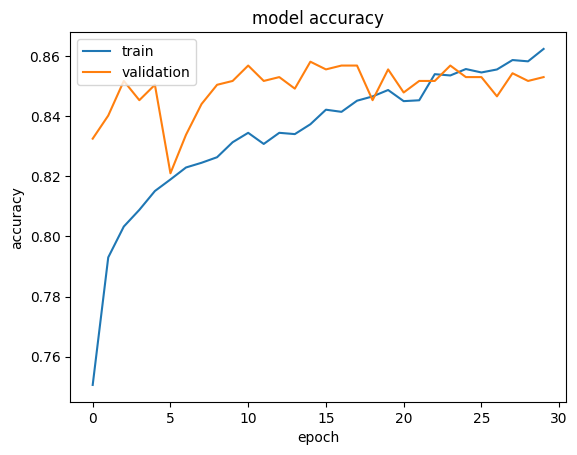

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.imshow

In [ ]:
#'from tensorflow.keras.wrappers.scikit_learn import KerasClassifier' need 2.12 environment
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 43.1 MB/s eta 0:00:00
  Attempting uninstall: ten

In [ ]:
#pip install --upgrade tensorflow


**cross-fold validation**

hr1

In [ ]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Define a function to create the model (needed for KerasClassifier)
def create_model():
    model = Sequential()
    model.add(Dense(256,input_shape=(hr1_rfe.shape[1]-1,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Define the cross-validation fold and the batch sizes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
batch_sizes = [16, 32, 64, 128, 256]

X = hr1_train.drop("booking_status", axis=1)
y = hr1_train["booking_status"]

# Conduct the cross-validation and store the results
results = {}
for batch_size in batch_sizes:
    model.set_params(batch_size=batch_size)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    results[batch_size] = np.mean(cv_scores)

# Print the cross-validation scores for each batch size
for batch_size, score in results.items():
    print(f"Batch Size {batch_size}: Mean Accuracy = {score:.4f}")


Batch Size 16: Mean Accuracy = 0.8300
Batch Size 32: Mean Accuracy = 0.8283
Batch Size 64: Mean Accuracy = 0.8304
Batch Size 128: Mean Accuracy = 0.8320
Batch Size 256: Mean Accuracy = 0.8232


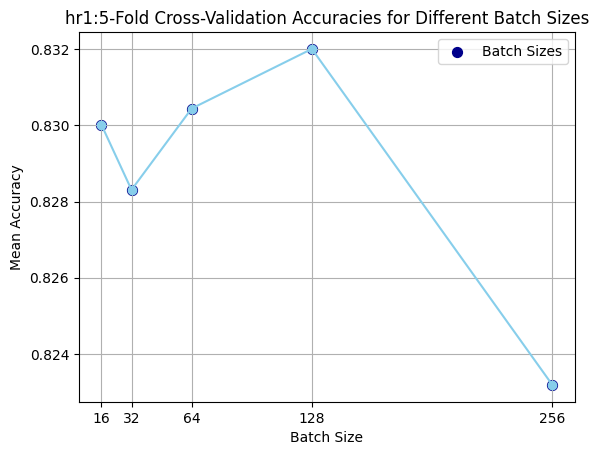

In [ ]:
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='skyblue')


# Add title and labels to the plot
plt.title('hr1:5-Fold Cross-Validation Accuracies for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')

# Highlight the markers with a larger size and a different color if desired
plt.scatter(results.keys(), results.values(), color='darkblue', s=50, label='Batch Sizes')

# Optionally, you can set the x-ticks to clearly represent each batch size
plt.xticks(list(results.keys()))


plt.legend()
# Show grid lines for better readability
plt.grid(True)


plt.show()


hr2

In [ ]:
# Define a function to create the model (needed for KerasClassifier)
def create_model():
    model = Sequential()
    model.add(Dense(256,input_shape=(hr2_rfe.shape[1]-1,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Define the cross-validation fold and the batch sizes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
batch_sizes = [16, 32, 64, 128, 256]

X = hr2_train.drop("booking_status", axis=1)
y = hr2_train["booking_status"]

# Conduct the cross-validation and store the results
results = {}
for batch_size in batch_sizes:
    model.set_params(batch_size=batch_size)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    results[batch_size] = np.mean(cv_scores)

# Print the cross-validation scores for each batch size
for batch_size, score in results.items():
    print(f"Batch Size {batch_size}: Mean Accuracy = {score:.4f}")

Batch Size 16: Mean Accuracy = 0.8611
Batch Size 32: Mean Accuracy = 0.8621
Batch Size 64: Mean Accuracy = 0.8579
Batch Size 128: Mean Accuracy = 0.8597
Batch Size 256: Mean Accuracy = 0.8549


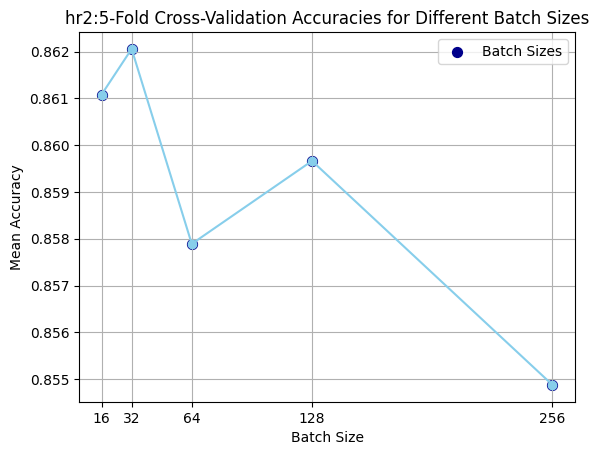

In [ ]:
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='skyblue')

# Add title and labels to the plot
plt.title('hr2:5-Fold Cross-Validation Accuracies for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')

# Highlight the markers with a larger size and a different color if desired
plt.scatter(results.keys(), results.values(), color='darkblue', s=50, label='Batch Sizes')

plt.xticks(list(results.keys()))
plt.legend()

# Show grid lines for better readability
plt.grid(True)
plt.show()

hr3

In [ ]:
# Define a function to create the model (needed for KerasClassifier)
def create_model():
    model = Sequential()
    model.add(Dense(256,input_shape=(hr3_rfe.shape[1]-1,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Define the cross-validation fold and the batch sizes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
batch_sizes = [16, 32, 64, 128, 256]

X = hr3_train.drop("booking_status", axis=1)
y = hr3_train["booking_status"]

# Conduct the cross-validation and store the results
results = {}
for batch_size in batch_sizes:
    model.set_params(batch_size=batch_size)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    results[batch_size] = np.mean(cv_scores)

# Print the cross-validation scores for each batch size
for batch_size, score in results.items():
    print(f"Batch Size {batch_size}: Mean Accuracy = {score:.4f}")

Batch Size 16: Mean Accuracy = 0.8954
Batch Size 32: Mean Accuracy = 0.8924
Batch Size 64: Mean Accuracy = 0.8929
Batch Size 128: Mean Accuracy = 0.8887
Batch Size 256: Mean Accuracy = 0.8889


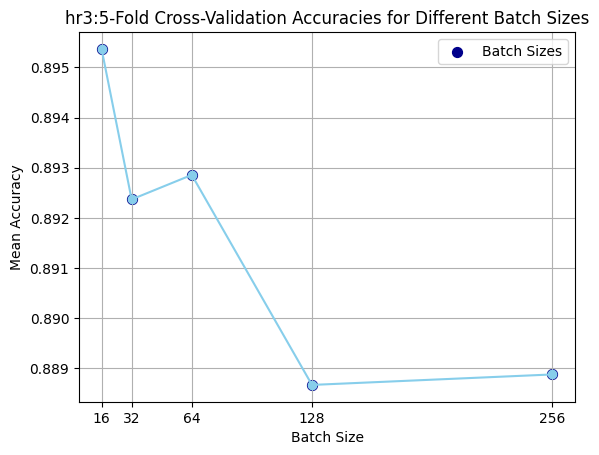

In [ ]:
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='skyblue')

# Add title and labels to the plot
plt.title('hr3:5-Fold Cross-Validation Accuracies for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')

# Highlight the markers with a larger size and a different color if desired
plt.scatter(results.keys(), results.values(), color='darkblue', s=50, label='Batch Sizes')

plt.xticks(list(results.keys()))
plt.legend()

# Show grid lines for better readability
plt.grid(True)
plt.show()

# ***Random Forests***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(n_estimators=150,
                                  #max_depth=10,
                                  #min_samples_split=2,
                                  #min_samples_leaf=1,
                                  random_state=42)

# Fit the model on the training data
rf_model.fit(hr1_train.drop("booking_status",axis=1),hr1_train["booking_status"])


train_predictions = rf_model.predict(hr1_train.drop("booking_status", axis=1))

train_accuracy = accuracy_score(hr1_train["booking_status"], train_predictions)

print(f"Training Accuracy of the Random Forest model: {train_accuracy:.4f}")

Training Accuracy of the Random Forest model: 0.9945


**validation performance**

In [ ]:
# Make predictions on the test data
predictions = rf_model.predict(hr1_validation.drop("booking_status",axis=1))

# Calculate the accuracy comparing the predictions to the true labels
accuracy = accuracy_score(hr1_validation["booking_status"], predictions)

# Print the accuracy
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")

Accuracy of the Random Forest model: 0.8645


In [ ]:
confusion_matrix = confusion_matrix(hr3_validation["booking_status"], predictions)

print("Confusion Matrix for the Validation Data:")
print(confusion_matrix)

Confusion Matrix for the Validation Data:
[[1075   56]
 [  99  363]]


In [ ]:
classification_report = classification_report(hr3_validation["booking_status"], predictions)
print("Classification Report for the Validation Data:")
print(classification_report)

Classification Report for the Validation Data:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1131
           1       0.87      0.79      0.82       462

    accuracy                           0.90      1593
   macro avg       0.89      0.87      0.88      1593
weighted avg       0.90      0.90      0.90      1593



resampling

In [ ]:
#resampling
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a SMOTE object
sm = SMOTE(random_state=42)

# Resample the training data
X_train_res, y_train_res = sm.fit_resample(hr1_train.drop("booking_status", axis=1), hr1_train["booking_status"])

# Define the Random Forest model
rf_model_res = RandomForestClassifier(n_estimators=150, random_state=42)

# Fit the model on the resampled training data
rf_model_res.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
# 评估过采样后训练集上的准确率
resampled_train_predictions = rf_model_res.predict(X_train_res)
resampled_train_accuracy = accuracy_score(y_train_res, resampled_train_predictions)
print(f"Training Accuracy on resampled data: {resampled_train_accuracy:.4f}")

# 评估原始训练集上的准确率
original_train_predictions = rf_model_res.predict(hr1_train.drop("booking_status", axis=1))
original_train_accuracy = accuracy_score(hr1_train["booking_status"], original_train_predictions)
print(f"Training Accuracy on original data: {original_train_accuracy:.4f}")

# 评估测试集上的准确率
test_predictions = rf_model_res.predict(hr1_validation.drop("booking_status", axis=1))
test_accuracy = accuracy_score(hr1_validation["booking_status"], test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy on resampled data: 0.9962
Training Accuracy on original data: 0.9947
Test Accuracy: 0.8581


在不改变模型参数的情况下，resampling后没有解决over fitting的问题

In [ ]:
# 定义调整参数后的随机森林模型
rf_model_tuned = RandomForestClassifier(
    n_estimators=100,  # 减少树的数量
    max_depth=10,      # 限制树的最大深度
    min_samples_split=10,  # 增加分裂一个节点所需的最小样本数
    min_samples_leaf=5,    # 增加一个叶子节点所需的最小样本数
    class_weight='balanced',  # 使用类别权重进行平衡处理
    random_state=42
)

# 在重采样后的训练数据上拟合模型
rf_model_tuned.fit(X_train_res, y_train_res)

# 使用重采样后的训练数据评估模型
resampled_train_predictions = rf_model_tuned.predict(X_train_res)
resampled_train_accuracy = accuracy_score(y_train_res, resampled_train_predictions)
print(f"Training Accuracy on resampled data: {resampled_train_accuracy:.4f}")

# 使用原始训练数据评估模型
original_train_predictions = rf_model_tuned.predict(hr1_train.drop("booking_status", axis=1))
original_train_accuracy = accuracy_score(hr1_train["booking_status"], original_train_predictions)
print(f"Training Accuracy on original data: {original_train_accuracy:.4f}")

# 使用测试集数据评估模型
test_predictions = rf_model_tuned.predict(hr1_validation.drop("booking_status", axis=1))
test_accuracy = accuracy_score(hr1_validation["booking_status"], test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy on resampled data: 0.8529
Training Accuracy on original data: 0.8381
Test Accuracy: 0.8542


在修改模型参数后，会发现overfitting的问题已经被解决了，而且resampling的效果会更好一些

hr1

In [ ]:
# Define your cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Values to test for n_estimators
n_estimators_values = [10, 50, 100, 150, 200]

X = hr1_train.drop("booking_status", axis=1)
y = hr1_train["booking_status"]


# Initialize dictionary to store mean cross-validation scores
cv_scores_dict = {}

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Obtain cross-validation scores for the current number of trees
    cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

    # Store the mean of the scores
    cv_scores_dict[n_estimators] = np.mean(cv_scores)

# Print out the mean cross-validation scores for each n_estimators value
for n_estimators, cv_score in cv_scores_dict.items():
    print(f"n_estimators: {n_estimators}, Mean CV Accuracy: {cv_score:.4f}")

n_estimators: 10, Mean CV Accuracy: 0.8528
n_estimators: 50, Mean CV Accuracy: 0.8590
n_estimators: 100, Mean CV Accuracy: 0.8569
n_estimators: 150, Mean CV Accuracy: 0.8585
n_estimators: 200, Mean CV Accuracy: 0.8587


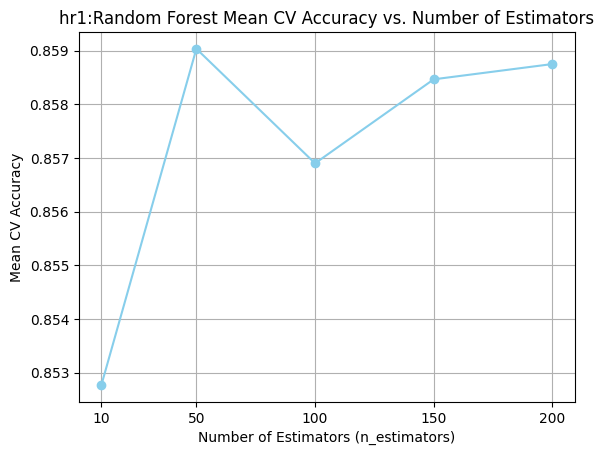

In [ ]:
# Plotting with a line and markers at each data point
#plt.figure(figsize=(10, 5))
plt.plot(list(cv_scores_dict.keys()), list(cv_scores_dict.values()), marker='o', linestyle='-', color='skyblue')

# Adding plot details
plt.title('hr1:Random Forest Mean CV Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(list(cv_scores_dict.keys()))
plt.grid(True)

# Show the plot
plt.show()

hr2

In [ ]:
X = hr2_train.drop("booking_status", axis=1)
y = hr2_train["booking_status"]


# Initialize dictionary to store mean cross-validation scores
cv_scores_dict = {}

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Obtain cross-validation scores for the current number of trees
    cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

    # Store the mean of the scores
    cv_scores_dict[n_estimators] = np.mean(cv_scores)

# Print out the mean cross-validation scores for each n_estimators value
for n_estimators, cv_score in cv_scores_dict.items():
    print(f"n_estimators: {n_estimators}, Mean CV Accuracy: {cv_score:.4f}")

n_estimators: 10, Mean CV Accuracy: 0.8793
n_estimators: 50, Mean CV Accuracy: 0.8853
n_estimators: 100, Mean CV Accuracy: 0.8853
n_estimators: 150, Mean CV Accuracy: 0.8855
n_estimators: 200, Mean CV Accuracy: 0.8855


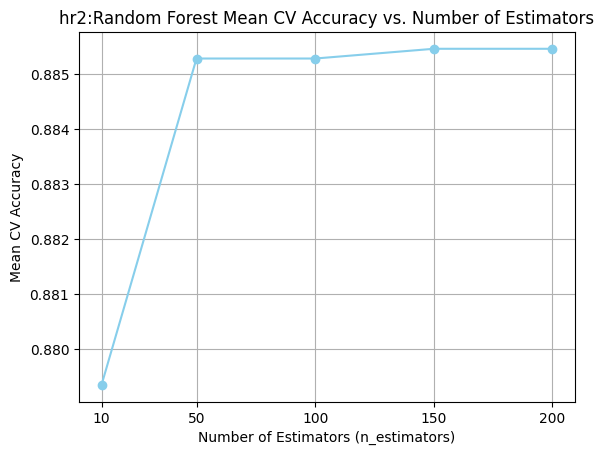

In [ ]:
plt.plot(list(cv_scores_dict.keys()), list(cv_scores_dict.values()), marker='o', linestyle='-', color='skyblue')

# Adding plot details
plt.title('hr2:Random Forest Mean CV Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(list(cv_scores_dict.keys()))
plt.grid(True)

# Show the plot
plt.show()

hr3

In [ ]:
X = hr3_train.drop("booking_status", axis=1)
y = hr3_train["booking_status"]


# Initialize dictionary to store mean cross-validation scores
cv_scores_dict = {}

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Obtain cross-validation scores for the current number of trees
    cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

    # Store the mean of the scores
    cv_scores_dict[n_estimators] = np.mean(cv_scores)

# Print out the mean cross-validation scores for each n_estimators value
for n_estimators, cv_score in cv_scores_dict.items():
    print(f"n_estimators: {n_estimators}, Mean CV Accuracy: {cv_score:.4f}")

n_estimators: 10, Mean CV Accuracy: 0.9060
n_estimators: 50, Mean CV Accuracy: 0.9123
n_estimators: 100, Mean CV Accuracy: 0.9108
n_estimators: 150, Mean CV Accuracy: 0.9127
n_estimators: 200, Mean CV Accuracy: 0.9117


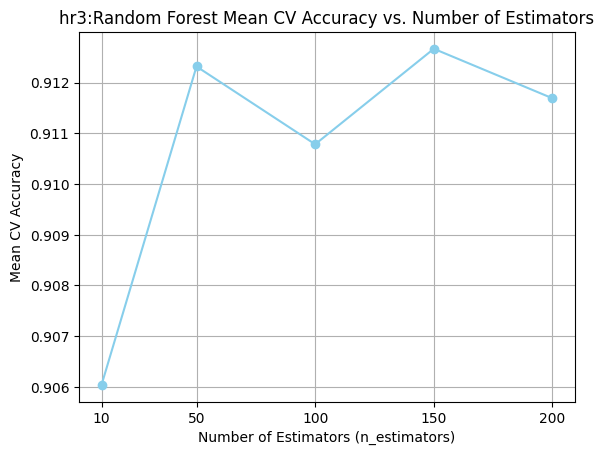

In [ ]:
plt.plot(list(cv_scores_dict.keys()), list(cv_scores_dict.values()), marker='o', linestyle='-', color='skyblue')

# Adding plot details
plt.title('hr3:Random Forest Mean CV Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(list(cv_scores_dict.keys()))
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
'''
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(conf_matrix)

# Alternatively, you can use seaborn to create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Booked', 'Booked'],
            yticklabels=['Not Booked', 'Booked'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
'''

In [ ]:
import matplotlib.pyplot as plt

# Data for ANN
ann_accuracies = {
    'hr1': [0.8371, 0.8438, 0.8393, 0.8368, 0.8349],
    'hr2': [0.8636, 0.8610, 0.8594, 0.8594, 0.8607],
    'hr3': [0.8934, 0.8936, 0.8955, 0.8916, 0.8849]
}

# Data for Random Forest
rf_accuracies = {
    'hr1': [0.8596, 0.8657, 0.8653, 0.8644, 0.8657],
    'hr2': [0.8812, 0.8874, 0.8875, 0.8886, 0.8887],
    'hr3': [0.9108, 0.9132, 0.9150, 0.9158, 0.9153]
}

# Calculate mean accuracies for each model and dataset
mean_ann_accuracies = {dataset: sum(accuracies)/len(accuracies) for dataset, accuracies in ann_accuracies.items()}
mean_rf_accuracies = {dataset: sum(accuracies)/len(accuracies) for dataset, accuracies in rf_accuracies.items()}

# Prepare data for plotting
datasets = ['hr1', 'hr2', 'hr3']
ann_means = [mean_ann_accuracies[ds] for ds in datasets]
rf_means = [mean_rf_accuracies[ds] for ds in datasets]

In [ ]:
# Re-plotting with highlighted data points (nodes)
plt.figure(figsize=(10, 6))
plt.plot(datasets, ann_means, marker='o', markersize=8, label='ANN Mean Accuracies')
plt.plot(datasets, rf_means, marker='o', markersize=8, label='Random Forest Mean Accuracies')

# Highlighting the nodes with text annotations
for i, txt in enumerate(ann_means):
    plt.annotate(f'{txt:.4f}', (datasets[i], ann_means[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(rf_means):
    plt.annotate(f'{txt:.4f}', (datasets[i], rf_means[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Mean Accuracy Comparison Between ANN and Random Forest Across Datasets')
plt.xlabel('Datasets')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('/Users/linpengyu/Desktop/Accuracy_Comparison_Plot.png')
plt.show()

In [ ]:
# Data for ANN and Random Forest on validation sets
validation_accuracies = {
    'ANN': {'hr1': 0.8669, 'hr2': 0.8780, 'hr3': 0.8908},
    'RM': {'hr1': 0.8708, 'hr2': 0.8987, 'hr3': 0.9052}
}

# Prepare data for plotting
datasets = ['hr1', 'hr2', 'hr3']
ann_validation = [validation_accuracies['ANN'][ds] for ds in datasets]
rm_validation = [validation_accuracies['RM'][ds] for ds in datasets]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(datasets, ann_validation, marker='o', label='ANN Validation Accuracies')
plt.plot(datasets, rm_validation, marker='o', label='Random Forest Validation Accuracies')

# Highlighting the nodes with text annotations
for i, txt in enumerate(ann_validation):
    plt.annotate(f'{txt:.4f}', (datasets[i], ann_validation[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(rm_validation):
    plt.annotate(f'{txt:.4f}', (datasets[i], rm_validation[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.title('Validation Set Accuracy Comparison Between ANN and Random Forest')
plt.xlabel('Datasets')
plt.ylabel('Validation Set Accuracy')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('/Users/linpengyu/Desktop/Validation Set Accuracy.png')
plt.show()

In [ ]:
# Data for ANN and Random Forest on validation sets before dimension reduction
before_validation_accuracies = {
    'ANN': {'hr1': 0.8669, 'hr2': 0.8780, 'hr3': 0.8908},
    'RM': {'hr1': 0.8708, 'hr2': 0.8987, 'hr3': 0.9052}
}

# Data for ANN and Random Forest on validation sets after dimension reduction
after_validation_accuracies = {
    'ANN': {'hr1': 0.8581, 'hr2': 0.8700, 'hr3': 0.8983},
    'RM': {'hr1': 0.8600, 'hr2': 0.8900, 'hr3': 0.9000}
}

# Prepare data for plotting
datasets = ['hr1', 'hr2', 'hr3']
ann_before = [before_validation_accuracies['ANN'][ds] for ds in datasets]
rm_before = [before_validation_accuracies['RM'][ds] for ds in datasets]
ann_after = [after_validation_accuracies['ANN'][ds] for ds in datasets]
rm_after = [after_validation_accuracies['RM'][ds] for ds in datasets]

# Plotting
plt.figure(figsize=(10, 6))

# ANN
plt.plot(datasets, ann_before, marker='o', color='b',label='ANN Before Dimension Reduction')
plt.plot(datasets, ann_after, marker='o', linestyle='--', color='b',label='ANN After Dimension Reduction')

# RM
plt.plot(datasets, rm_before, marker='o', color='orange',label='RM Before Dimension Reduction')
plt.plot(datasets, rm_after, marker='o', linestyle='--',color='orange', label='RM After Dimension Reduction')

plt.title('Validation Set Accuracy: Before and After Dimension Reduction')
plt.xlabel('Datasets')
plt.ylabel('Validation Set Accuracy')
plt.legend()
plt.grid(True)

plt.savefig('/Users/linpengyu/Desktop/Before and After Dimension Reduction.png')
plt.show()
